<a href="https://colab.research.google.com/github/Meledre/Dataton_2022/blob/main/DATATON_%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%B0_%22Full_stack_senior_procrastinators%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Команда "Full stack senior procrastinators"



###Импорт

In [216]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from PIL import Image

In [249]:
! pip install -U scikit-image
from skimage.io import imread

! pip install dicom
import dicom
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Классы

In [217]:
classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trachea_segmentation.v1i.png-mask-semantic/test/_classes.csv')
classes

,Pixel Value,Class
0,0,background
1,1,trachea
2,2,trachea-normal


###Конвертация

In [218]:
# конвертация изображений из jpeg в png (на локальном диске)
from PIL import Image
import glob

for file in glob.glob("*.jpg"):
    im = Image.open(file)
    im.save(file.replace("jpg","png"))

###Преобразование в формат DataFrame

In [219]:
names = '/content/drive/MyDrive/Colab Notebooks/trachea_PNG' 
names_lst = os.listdir(names) 
mask = '/content/drive/MyDrive/Colab Notebooks/mask_PNG'
mask_lst = os.listdir(mask) 

In [245]:
# сортировка имен файлов для сопоставления
def sort_num(list):
    return list[7:]

img_sort = sorted(names_lst, key=sort_num)

mask_sort = sorted(mask_lst, key=sort_num)

data_sort = zip(img_sort,mask_sort)
index = [i for i in range(1,len(img_sort)+1)]

In [221]:
trachea_data = pd.DataFrame(data_sort, index=index)

In [222]:
trachea_data.columns=['imgID','maskID']
trachea_data

,imgID,maskID
1,IM-0001-0001_png.rf.c7696c0dbef8d06d963344c655...,IM-0001-0001_jpg.rf.c7696c0dbef8d06d963344c655...
2,IM-0001-0001_png.rf.d6a48c061c5b5e2bbb9a14f8e3...,IM-0001-0001_jpg.rf.d6a48c061c5b5e2bbb9a14f8e3...
3,IM-0001-0002_png.rf.71b2acbed3fa56540a85b225b4...,IM-0001-0002_jpg.rf.71b2acbed3fa56540a85b225b4...
4,IM-0001-0002_png.rf.d25c5512b25dff8b75b865a3ee...,IM-0001-0002_jpg.rf.d25c5512b25dff8b75b865a3ee...
5,IM-0001-0003_png.rf.8b12ccd65c574258c737d3323c...,IM-0001-0003_jpg.rf.8b12ccd65c574258c737d3323c...
...,...,...
394,IM-0001-0133_png.rf.c9cf18d6c4bcd759f60c919a21...,IM-0001-0133_jpg.rf.c9cf18d6c4bcd759f60c919a21...
395,IM-0001-0134_png.rf.dfa87041e10f7292fcda6bfcfc...,IM-0001-0134_jpg.rf.dfa87041e10f7292fcda6bfcfc...
396,IM-0001-0135_png.rf.591f25330b462ca82f0ff94709...,IM-0001-0135_jpg.rf.591f25330b462ca82f0ff94709...
397,IM-0001-0139_png.rf.c03d2a63f91d2f58c4d9392a69...,IM-0001-0139_jpg.rf.c03d2a63f91d2f58c4d9392a69...


In [223]:
#сравнение с полученной таблицей
print("Number of DICOM Images:", len(names_lst))

Number of DICOM Images: 398


In [224]:
def readImg(img):
    image = plt.imread(img)
    return image

In [233]:
# 1 срез
img = readImg('/content/drive/MyDrive/Colab Notebooks/trachea_PNG/IM-0001-0001_png.rf.c7696c0dbef8d06d963344c655981b2d.png')
img.shape  

(512, 512, 3)

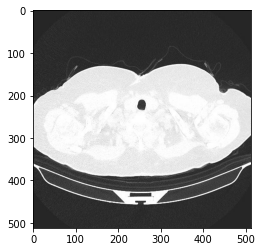

In [234]:
plt.imshow(img,cmap = 'gray')

In [235]:
# 1 срез маски
mask = readImg('/content/drive/MyDrive/Colab Notebooks/mask_PNG/IM-0001-0001_jpg.rf.c7696c0dbef8d06d963344c655981b2d_mask.png')
mask.shape 

(512, 512)

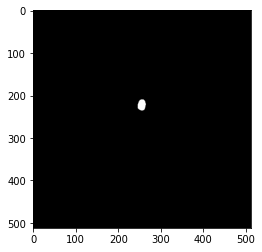

In [236]:
plt.imshow(mask, cmap='gray')

#Полученные изображения были выполнены на одном и том же аппарате КТ, соответсвенно необходимости в нормализации в данном датасете не было выявлено. Ниже приводится код для улучшения входных данных с целью дальнейшего сбора датасета, включая аппараты КТ разных производителей.

*Для приведения к единому размеру (в данном случае - 512х512)*

In [260]:
def resize(img):
    image_size = 512
    dim = (image_size, image_size)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
    return resized

*Для нормализации*

In [263]:
def norm(img):
    norm = cv2.normalize(img, None, alpha=0, beta=250, norm_type=cv2.NORM_MINMAX)
    return norm

##Сегментация

##Сегментация изображений проводилась на платформе Roboflow


---




*Пример сегментации 1 среза у пациента со спавшейся трахеей, что косвенно свидетельствует о неполном вдохе, либо трудности с задержкой дыхания*

![trachea.png](
+gAw+KN8osrfhy+VWSob9NNxeWq+mzFGiYjK07Q5VGmNG7nRAwzZgWWPeBdvdYs7QJ2BcYnnklAKR6AIKYuEqzqJiJAcrwIh4MuECtaIi0AFOs8MORsiWLyyLxP7F5QFsoQ6AeqiefjFxbTIYlwCch0tTynJFomsWJeitrvgg2mCC03EKsRyCJDIqAkWcHJ8yntx1xhZ8XNlsgQYkujpudP0TdlRqfdKR6IQLvVSGc+7KRJj7q7UnEuN1wHG1SDHADC4IwAMxxh4/pp/f/fBrj07wPBvfi9BwwFdDBiunKlOoS+RmY/2uVOwK53iAQch5SbodkY5FWLlAEe+oNIc7FuFTBS4d0n3Khg6JG6MywImW8T9CtfrQKwY55ooi3WIT+dmPqsZqzDq4NxWCCbxvBNu+gDqyHS6CTykijmuVTgfxbcP9K0DZeZsznPFQedpxuUcu2IAcdMHklxJqqvBBcthCcd+eBjGC02qXI/rEE2lpA6HzG911CnErspcGC11O3/FlTN5rFMZO6XNVavuGe5a0EWJhaTHcipunH8T3H3IQMPUdQ3O6ELG/EwARtlp+Yx/Fz6t3C3D6pdNdeTH5+IcgHG9smB4gxdmtZiHXR4Hn8zyG2XSfBV8irqDf7NP7SqJXCUpk2RkKvO6Jn7gcGqUiSghBOMHFJ4DhAi5wCgC93QeXS1YokQRvz6Sezc9TUJIf9iv8FyMzpIUdbE4WCIDr9nBKS0SfFXnzskog83ZnLIMtuRWAZ+8OOZ0Kh1ySo3xuebKf1Zi3135pPCtsQOMQZ177qoAo3x3kwaAwQqwaLyuA5+FMdwDTR4TgOFhGy3AKCdO9PhhQh0YSCPPnfrGlTE35cSV88W/Q30vPcm6kcun+SAFE7+7d8Fa/s7fJV+a479+auUoU2vD0JE5DWsoMwAAAWhJREFUc7MQD5cFFK7KQWbInCvFOjg9Bbgn+4NygIeEjs1XKR0zHe5p2NbBJPcuJfYA00QubUlv9aMD/fBAKCkoQecScZ7XM24D8aBzQSACQsoKg2IPkXLmCDHnWz33tupCO26ONMCDQak69+HN369M534FqNRTO33Oe+R7WZ/Vs4aN8ZT6nDy/Awl2VGdp7aY5ufFUiHL8TCCEj+qZNOJLPK/+Tjv+vCwKP8MzJglbBjuGbwm05uCkAwzlgp71mf695Ya8PLXd3aI4MXb47IpCiAsTWx7EhUkCITioOq36nuDVwyHK8tVI89q5M5XR1TD7d4GO8r+brk0DtJjv6f5IBSViYOIIgKyPXPS6SzSP6tdc2Arl6riMVdol2MepK4MNFOH34oM2X2pNolm58j009edG0DZdF3/P/zeMy6MxDcTaWMXqAIIKMP2IxwRkZWjtZOT2Nv4OBqaBaCagbcZAMwRTDa6dGwAQWV2IRTSuUwAAABR0RVh0U29mdHdhcmUAWWFuZGV4LkRpc2tOX/iRAAAAAElFTkSuQmCC)

*Пример сегментации 1 среза у пациента с нормально расправленной трахеей*

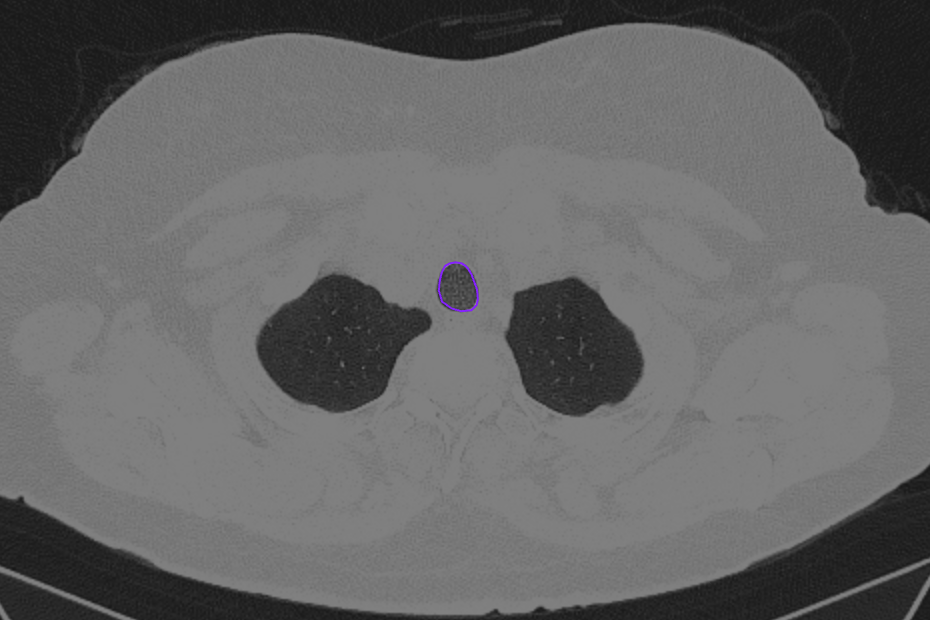

#Данные о первой версии датасета, отправленной на обучение нейросети на базе Roboflow 

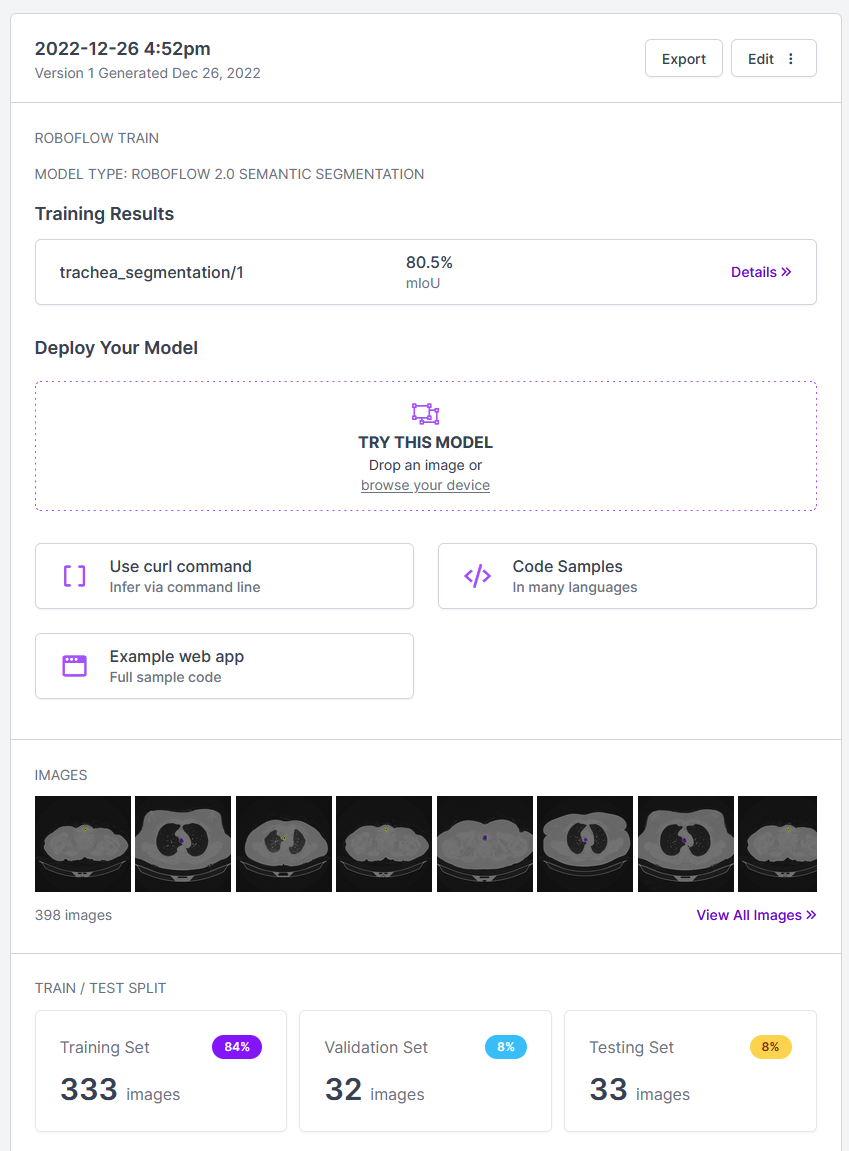

##Результы тренировки на собранном датасете в Roboflow

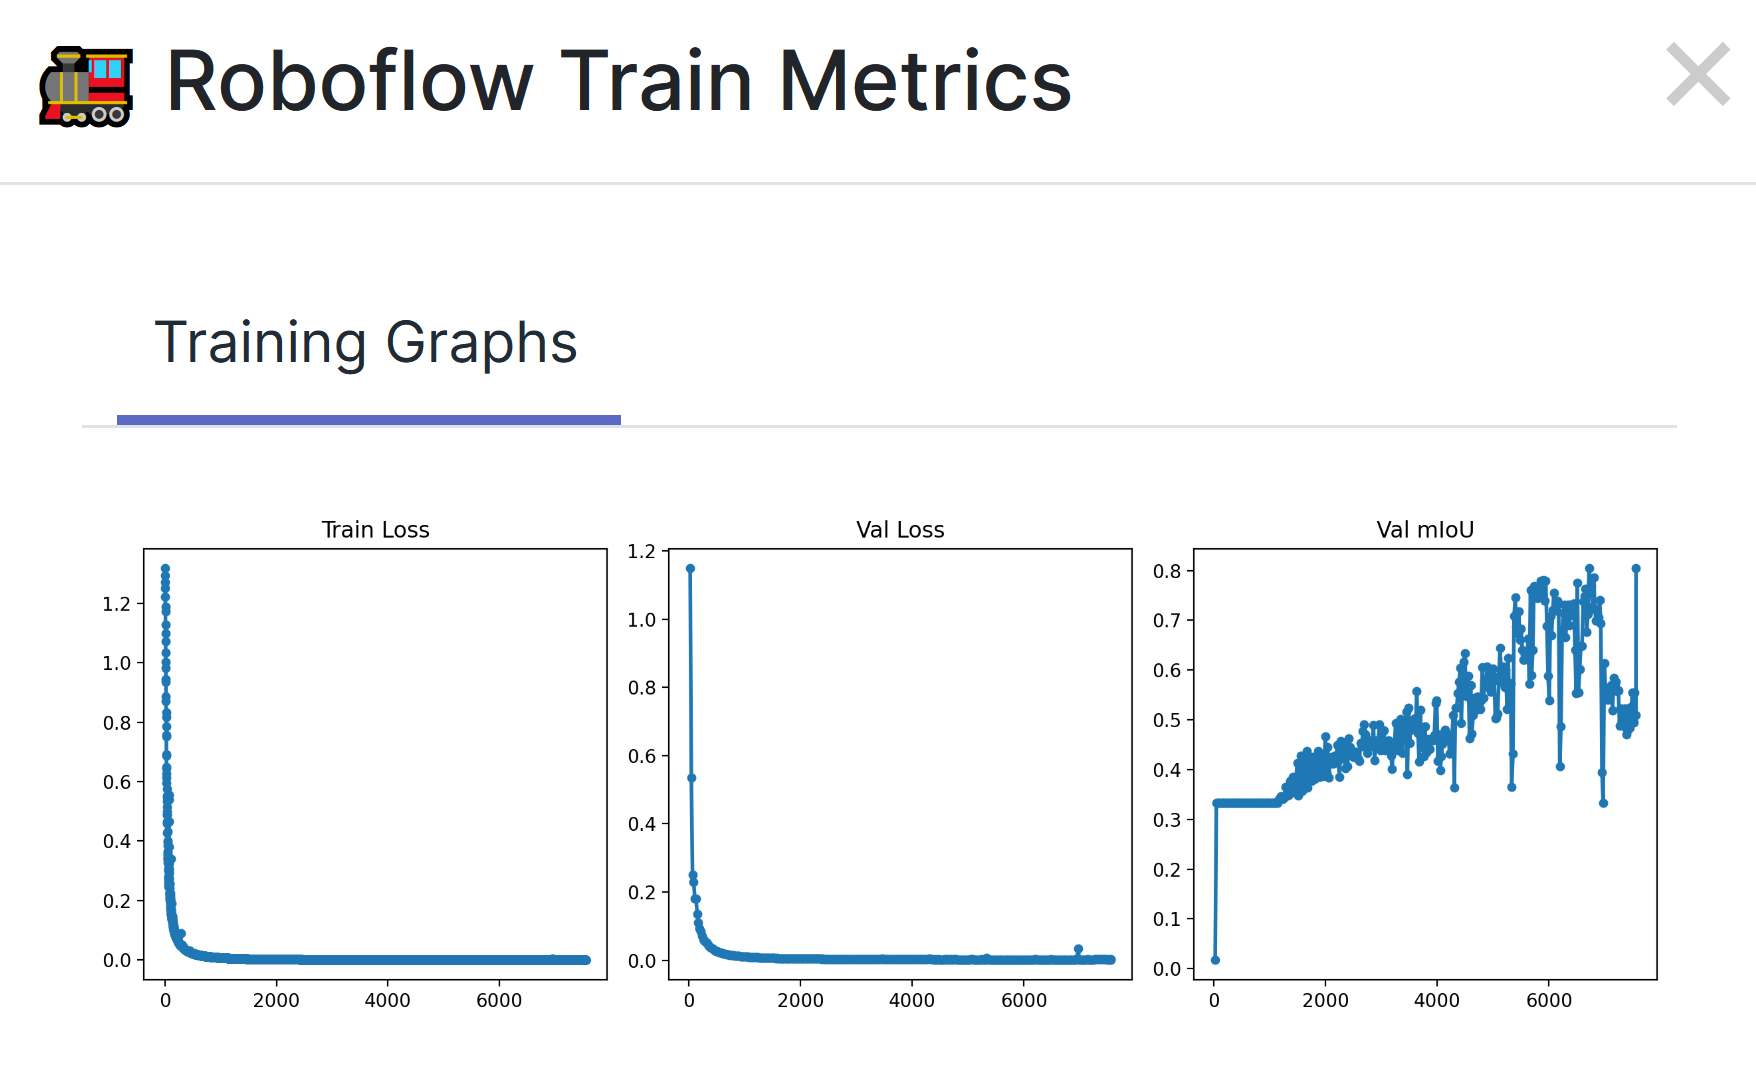

##Ссылки на датасет без разметки: 
https://disk.yandex.ru/d/62Kku4ujS0SBWQ (с целевым признаком)

https://disk.yandex.ru/d/sxYUlbvuFYNa_A (без целевого признака)

##Ссылка на датасет с разметкой:
https://disk.yandex.ru/d/EJduy38OlAh4Lg (все изображения в формате png)